# B221910003 Б.Төгөлдөр

In [1]:
pip install linkpred

  Preparing metadata (setup.py) ... done
  Created wheel for smokesignal: filename=smokesignal-0.7.0-py3-none-any.whl size=6030 sha256=10e46830a3ebef4bcf76ab0ed99320c6cb6859c5e2ad14d12ed3afafd68bb9f7
  Stored in directory: /root/.cache/pip/wheels/dd/61/b2/4d7520f5b9b3e236bdef080edef4420f2203711b8f9279015f
Successfully built smokesignal


In [2]:
import linkpred

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

In [29]:
def read_net_w(filename):
    g = nx.Graph()
    with open(filename) as f:
        f.readline()
        for l in f:
            l = l.split(",")
            g.add_edge(l[0], l[1], weight=int(l[2]))
    return g

# Game of Thrones data
g = read_net_w(f'got-s6-edges.csv')

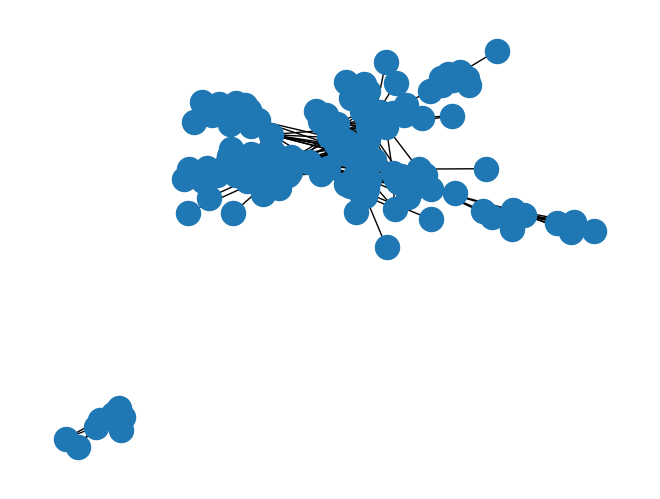

In [30]:
nx.draw(g)

In [31]:
# зөвхөн шинэ холбоосийн таамаглахын тулд 'excluded' параметрээр g.edges() утгыг дамжуулж байгаа. Нийтлэг хөршийн арга - Илүү олон дундын найзуудтай бол бид найз болох магадлал өндөр байна.
cn = linkpred.predictors.CommonNeighbours(g, excluded=g.edges()) # We aim to predict only new links, thus we exclude existing ones

# 'predict()' функцыг дуудаж, граф дээрх боломжит шинэ холболтуудын таамаглалыг гаргана.
cn_results = cn.predict()
# 'top(5)' функцээр бол таамаглалуудын дотроос хамгийн өндөр оноотой 5 холболтыг сонгон авна.
top = cn_results.top(5)
# 'for' давталтаар 'top' үр дүнгийн бүх элементийг давтаж,
# тус бүрийн ирмэг (edge) болон оноог (score) хэвлэж байна.
for edge, score in top.items():
    print(edge, score)

TOMMEN - MACE 8.0
NED - LADY_CRANE 8.0
NED - CLARENZO 8.0
MARGAERY - IZEMBARO 8.0
MARGAERY - ARYA 8.0


In [32]:
# Жаккардын арга - Топологи бүтэц болон аттрибутуудын ижил төсөөтэй байдал нь найз болох эсэхийг тодорхойлно.
jc = linkpred.predictors.Jaccard(g, excluded=g.edges())
jc_results = jc.predict()

top = jc_results.top(5)
for edge, score in top.items():
    print(edge, score)

RED_PRIEST - KINVARA 1.0
LITTLE_SAM - DICKON 1.0
TOMMEN - MACE 0.7272727272727273
JOFFREY - CAMELLO 0.7272727272727273
OLD_NAN - BENJEN 0.7142857142857143


In [33]:
# Adamic Adar - Бидний дундын найзын тоо нь биднийг найз болох эсэхийг тодорхойлоход ашиглагдана.
aa = linkpred.predictors.AdamicAdar(g, excluded=g.edges())
aa_results = aa.predict()

top = aa_results.top(5)
for edge, score in top.items():
    print(edge, score)

TOMMEN - MACE 3.187557281030789
NED - LADY_CRANE 3.126371165725783
NED - CLARENZO 3.126371165725783
SANSA - ROBB 3.096644315133246
JOFFREY - CAMELLO 2.8944937119329137


In [34]:
#Katz - Хоер оройн хоорондох жинтэй замын нийлбэр
kz = linkpred.predictors.Katz(g, excluded=g.edges())
kz_results = kz.predict()

top = kz_results.top(5)
for edge, score in top.items():
    print(edge, score)


LADY_CRANE - JAQEN 0.005571576860773001
SANSA - ALLISER_THORNE 0.004234378077202
TYRION - DAARIO 0.004145905054793999
CERSEI - BRIENNE 0.0038862606857720003
MELISANDRE - LYANNA_MORMONT 0.0035937193855959996


In [35]:
#Graph Distance - Графын зай буюу Distance нь хоёр оройн хоорондын богино замын уртаар тодорхойлогдоно.
gd = linkpred.predictors.GraphDistance(g, excluded=g.edges())
gd_results = gd.predict()

top = gd_results.top(5)
for edge, score in top.items():
    print(edge, score)

LADY_CRANE - JAQEN 36.136054421768705
TYRION - DAARIO 30.29268292682927
CERSEI - BRIENNE 28.44827586206896
MELISANDRE - LITTLEFINGER 23.427491305005294
CERSEI - BRONN 23.294117647058822


In [36]:
#SimRanking - Хоёр зангилаа холбоосоор холбогдохын тул тэдгээрийн хөрш оройнууд ижил төсөөтэй байх хэрэгтэй.
simrank = linkpred.predictors.SimRank(g, excluded=g.edges())
simrank_results = simrank.predict(c=0.5)

top = simrank_results.top(5)
for edge, score in top.items():
    print(edge, score)

MAESTER_CITADEL - MAESTER_AEMON 0.3920701611834253
RAY - GATINS 0.3886464843365491
GATINS - BERIC 0.3675791855431439
THOROS - GATINS 0.3636591552182033
MAESTER_AEMON - GILLY 0.319889623157789


In [37]:
#Random - Санамсаргүй байдлаар таах.
rnd = linkpred.predictors.Random(g, excluded=g.edges())
rnd_results = rnd.predict()

top = simrank_results.top(5)
for edge, score in top.items():
    print(edge, score)

MAESTER_CITADEL - MAESTER_AEMON 0.3920701611834253
RAY - GATINS 0.3886464843365491
GATINS - BERIC 0.3675791855431439
THOROS - GATINS 0.3636591552182033
MAESTER_AEMON - GILLY 0.319889623157789


In [38]:
import random  # Санамсаргүй тоо үүсгэх модулыг импортлосон
import itertools  # Комбинаторик үйлдлүүдийг гүйцэтгэх модулыг импортлосон
from linkpred.evaluation import Pair  # Холболтын үнэлгээнд хэрэглэгддэг Pair классыг импортлосон

test = read_net_w(f'got-s7-edges.csv')  # 'got-s7-edges.csv' файлыг уншиж, тест сүлжээг байгуулсан
training = g.copy()  # Сургалтын үед ашиглах гол сүлжээний хуулбарыг үүсгэж байна
nodes = list(g.nodes())  # Гол сүлжээний бүх оройнуудыг жагсаалт руу хөрвүүлсэн
nodes.extend(list(test.nodes()))  # Тест сүлжээний оройнуудыг гол сүлжээний оройнүүдийн жагсаалтанд нэмсэн
test = [Pair(i) for i in test.edges()]  # Тест сүлжээний холбоосыг Pair объектоор хөрвүүлсэн жагсаалтыг үүсгэсэн
universe = set([Pair(i) for i in itertools.product(nodes, nodes) if i[0]!=i[1]])  # Бүх боломжит, хоёр өөр оройнуудийн харилцааг Pair объектоор боловсруулж, давхарлагыг устгасан


In [39]:
# Сургалтын сүлжээ дээрх одоо байгаа холболтуудыг хассан CommonNeighbours таамаглагчийг үүсгэж байна.
cn = linkpred.predictors.CommonNeighbours(training, excluded=training.edges())
# CommonNeighbours объектын predict() функцээр шинэ холбоосуудын оноог таамаглаж, үр дүнг cn_results-д хадгална.
cn_results = cn.predict()

# Сургалтын сүлжээ дээрх одоо байгаа холболтуудыг хассан AdamicAdar таамаглагчийг үүсгэж байна.
aa = linkpred.predictors.AdamicAdar(training, excluded=training.edges())
# AdamicAdar объектын predict() функцээр шинэ холбоосуудын оноог тооцож, үр дүнг aa_results-д хадгална.
aa_results = aa.predict()

# Сургалтын сүлжээ дээрх одоо байгаа холболтуудыг хассан Jaccard таамаглагчийг үүсгэж байна.
jc = linkpred.predictors.Jaccard(training, excluded=training.edges())
# Jaccard объектын predict() функцээр шинэ холбоосуудын оноог тооцоолоод, үр дүнг jc_results-д хадгална.
jc_results = jc.predict()


In [40]:
# CommonNeighbours үр дүнг, тест сүлжээ болон бүх боломжит холбоосын өргөтгөл дээр EvaluationSheet объектийг үүсгэж байна.
cn_evaluation = linkpred.evaluation.EvaluationSheet(cn_results, test, universe)
# AdamicAdar үр дүнг, тест сүлжээ болон бүх боломжит холбоосын өргөтгөл дээр EvaluationSheet объектийг үүсгэж байна.
aa_evaluation = linkpred.evaluation.EvaluationSheet(aa_results, test, universe)
# Jaccard үр дүнг, тест сүлжээ болон бүх боломжит холбоосын өргөтгөл дээр EvaluationSheet объектийг үүсгэж байна.
jc_evaluation = linkpred.evaluation.EvaluationSheet(jc_results, test, universe)


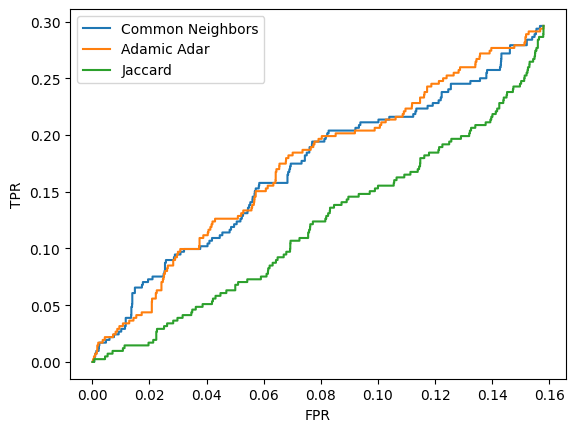

In [41]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import auc  # scikit-learn-ээс auc функцийг импортлон, ROC муруй доорх талбайг (AUC) тооцоолох болно

print("Area Under Roc Curve (AUROC)")  # ROC муруй доорх талбайг (AUROC) гэсэн гарчгийг хэвлэж байна

# Common Neighbours алгоритмын fallout болон recall утгуудыг ашиглан AUROC-г тооцоолдог ба үр дүнг хэвлэж байна.
print(f"Common Neigh.: \t {auc(cn_evaluation.fallout(), cn_evaluation.recall())}")

# Adamic Adar алгоритмын fallout болон recall утгуудыг ашиглан AUROC-г тооцоолдог ба үр дүнг хэвлэж байна.
print(f"Adamic Adar: \t {auc(aa_evaluation.fallout(), aa_evaluation.recall())}")

# Jaccard алгоритмын fallout болон recall утгуудыг ашиглан AUROC-г тооцоолдог ба үр дүнг хэвлэж байна.
print(f"Jaccard: \t {auc(jc_evaluation.fallout(), jc_evaluation.recall())}")


Area Under Roc Curve (AUROC)
Common Neigh.: 	 0.026832485313825823
Adamic Adar: 	 0.027259625028069757
Jaccard: 	 0.018894838921578106


**Даалгавар:**

1.   Jaccard болон Adamic Adar хоёр яагаад ялгаатай үр дүн үзүүлж байна вэ? Тайлбарлана уу.  
2.   linkpred санг ашиглан desicion tree алгоритмаар холбоосыг илрүүлж болох уу.





1.

Jaccard нь хоёр оройн хөршүүдийн нийлбэрийн харьцааг тооцоолдог.
Adamic Adar нь мөн хоёр оройн хамтын хөршүүдийн тоог авч үздэг боловч, хөршүүдийн дунд их холболттой, "ердийн" хөршүүдийг багасгах замаар үнэлдэг.
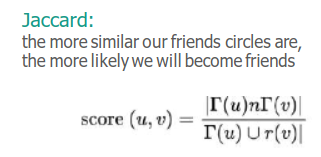


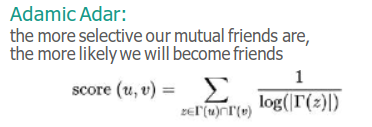

2.

Linkpred сан нь шууд decision tree алгоритмыг багтаагүй байдаг. Гэсэн хэдий ч, supervised learning аргачлалыг хэрэгжүүлэхдээ граф дахь өгөгдлийг онцлогууд (features) болон зөвхөн байгаа болон байхгүй холбоосыг (labels) авч боловсруулснаар decision tree classifier (жишээ нь scikit-learn-ийн DecisionTreeClassifier) ашиглан холбоосыг илрүүлэх боломжтой.

In [43]:
import random
import itertools
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Доор нь Linkpred‑ын predictor-уудын обьектуудыг үүсгэж, бүх candidate холбоосын оноог харуулах dictionarry‑г авна.
cn = linkpred.predictors.CommonNeighbours(training, excluded=training.edges())
cn_dict = cn.predict()  # Common Neighbours оноо

aa = linkpred.predictors.AdamicAdar(training, excluded=training.edges())
aa_dict = aa.predict()  # Adamic Adar оноо

jc = linkpred.predictors.Jaccard(training, excluded=training.edges())
jc_dict = jc.predict()  # Jaccard оноо

# Supervised сургалтын өгөгдлийг бэлтгэх:
# Positive жишээ: тест сүлжээний холбоосууд (Pair объектууд)
positive_pairs = test  # өмнөх алхамд test-г [Pair(edge) for edge in test.edges()] байдлаар бэлтгэсэн байна
positive_set = set(positive_pairs)

# Negative жишээ: universe-д байгаа бөгөөд positive_set-д багтаж байхгүй холбоосуудыг сонгон авах.
negative_candidates = list(universe - positive_set)
# Хамтын жишээний тэнцэтгэл (balanced dataset) үүсгэхийн тулд positives‑ын тоотой нь negative‑г санамсаргүйгээр сонгон авна.
num_pos = len(positive_pairs)
negative_pairs = random.sample(negative_candidates, num_pos)

# Эдгээс нь бүх жишээг нэгтгэж, Шошго (label)-г бэлдэнэ: positive-г 1, negative-г 0 гэж тэмдэглэе.
all_pairs = positive_pairs + negative_pairs
labels = [1] * len(positive_pairs) + [0] * len(negative_pairs)

# Candidate холбоос бүрийн хувьд онцлогуудыг гаргах:
# Онцлогууд бол: [Common Neighbours оноо, Adamic Adar оноо, Jaccard оноо]
data = []
for pair in all_pairs:
    # Дараах predictor‑уудын dictionarry-д тухайн холбоосын оноог авч, байхгүй бол 0-г ононо.
    cn_score = cn_dict.get(pair, 0)
    aa_score = aa_dict.get(pair, 0)
    jc_score = jc_dict.get(pair, 0)
    data.append([cn_score, aa_score, jc_score])

# Онцлогууд болон шошго утгуудыг NumPy массивуудад хөрвүүлнэ.
X = np.array(data)
y = np.array(labels)

# Decision Tree классификаторыг үүсгэн, сургалт явуулж байна.
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Сургалтын өгөгдөл дээр таамаг хийж, нарийвчилсан үнэлгээ (accuracy болон AUROC) үзүүлж байна.
y_pred = clf.predict(X)
accuracy = accuracy_score(y, y_pred)
roc_auc = roc_auc_score(y, clf.predict_proba(X)[:, 1])

print("Decision Tree Training Accuracy: ", accuracy)
print("Decision Tree AUROC: ", roc_auc)


Decision Tree Training Accuracy:  0.6383495145631068
Decision Tree AUROC:  0.6971292063342446
